<a href="https://colab.research.google.com/github/space-32/Python/blob/main/dmx_1st_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First step is to import modules required for this task
import pandas as pd #to read data set and pd is like an shortform given to panda
import numpy as np # to do operations on array
import os # to handle files
import matplotlib.pyplot as plt #to visualizedata as graphs in each and every detail
import seaborn as sns # to plot graph in simplier way

#second step is to load the dataset
dt=pd.read_csv('Iris.csv') #csv is the file type to read we used read function
dt.head() # to show the starting first five rows we used head function

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dt.describe() #to desplay the stats about data
dt.info() # to know thedata type of data
dt['Species'].value_counts() # to display the no. od sample on each class
dt.isnull().sum() #To check wheather there is null value or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

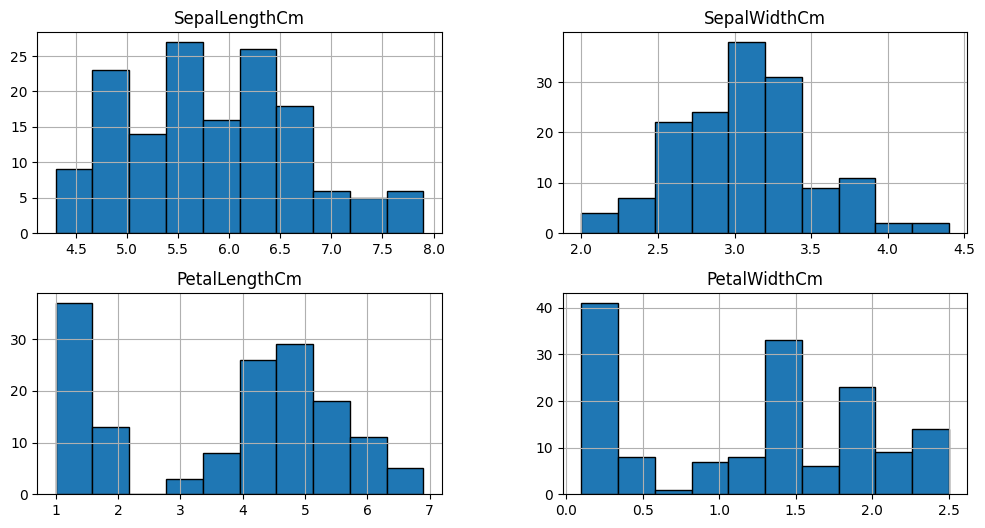

In [ ]:
df.hist(edgecolor='black', linewidth=1,figsize=(12,6))

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

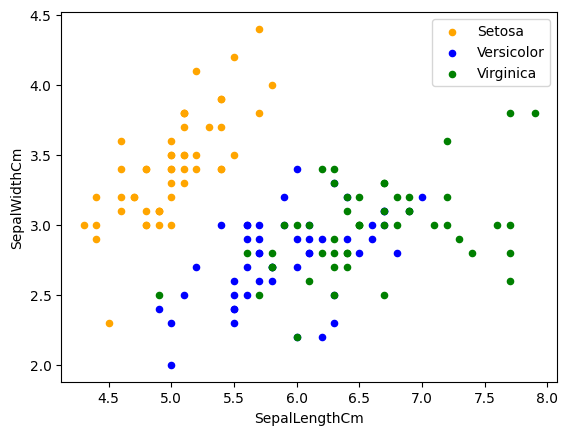

In [ ]:
scatter = df[df.Species == "Iris-setosa"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="Orange",label="Setosa")
df[df.Species == "Iris-versicolor"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="Blue",label="Versicolor",ax=scatter)
df[df.Species == "Iris-virginica"].plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm",color="Green",label="Virginica",ax=scatter)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

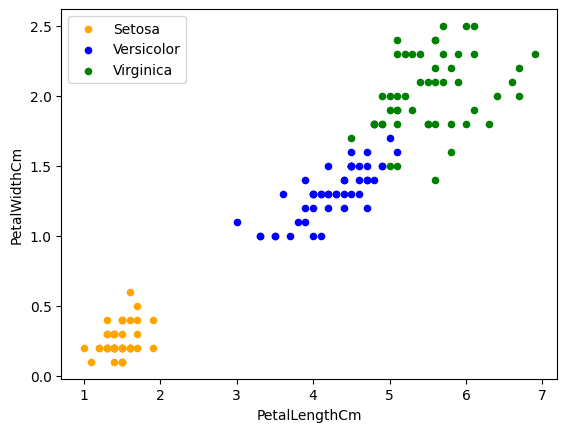

In [ ]:
scatter = df[df.Species == "Iris-setosa"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="Orange",label="Setosa")
df[df.Species == "Iris-versicolor"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="Blue",label="Versicolor",ax=scatter)
df[df.Species == "Iris-virginica"].plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm",color="Green",label="Virginica",ax=scatter)

In [ ]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
from sklearn.preprocessing import LabelEncoder

***Using the sklearn library to import learning algorithms***

<ipython-input-55-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

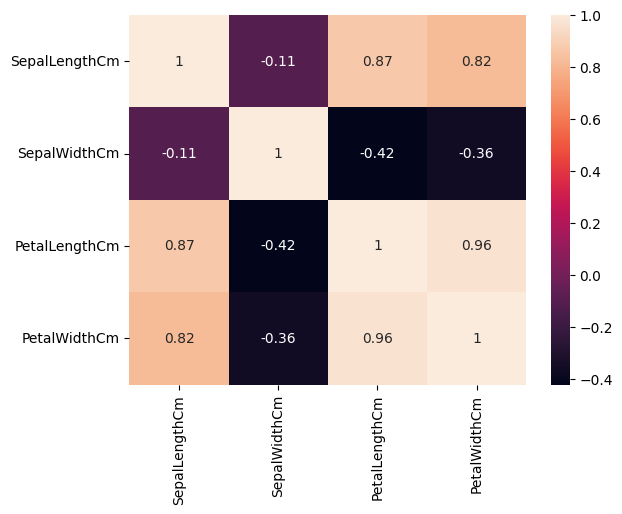

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
le = LabelEncoder()

In [ ]:
df["Species"] = le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Let's first try training our model on all 4 features, and then only 2 of the non-correlated ones and compare the results.**



In [ ]:
df.shape

(150, 5)

In [ ]:
train, test = train_test_split(df, test_size = 0.3) #test_size = 0.3 means 30% of the data will be used for testing

In [ ]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] # Choosing the training features
train_Y = train.Species # Assigning the output of the training data
test_X = test[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]] # Taking the same features for testing
test_Y = test.Species # Assigning the output of the testing data

**Trying the K-Nearest Neighbour algorithm**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3) # This examines 3 neighbours for categorising the new data
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [ ]:
print('The accuracy of KNN: ',metrics.accuracy_score(prediction,test_Y))

The accuracy of KNN:  0.9555555555555556


**Decision Tree algorithm**

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)

In [ ]:
print('The accuracy of Decision Tree: ',metrics.accuracy_score(prediction,test_Y))

The accuracy of Decision Tree:  0.9555555555555556


**Testing values for n neighbours from 1-10 and plotting them on a graph**

<ipython-input-66-ac367190c88e>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  num = pd.Series()


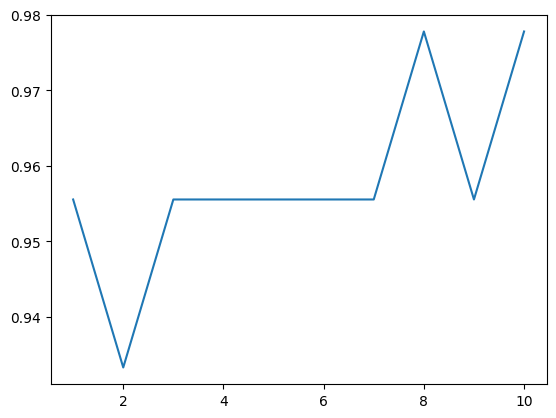

In [ ]:
num_index = list(range(1,11)) # Generates index positions from 1-10
num = pd.Series()
for i in range(1,11):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction = model.predict(test_X)
  num = pd.concat([num,pd.Series(metrics.accuracy_score(prediction,test_Y))]) # Adding the accuracy value to a pandas series so that it can be plotted

plt.plot(num_index,num)

In [ ]:
num

0    0.955556
0    0.933333
0    0.955556
0    0.955556
0    0.955556
0    0.955556
0    0.955556
0    0.977778
0    0.955556
0    0.977778
dtype: float64

In [ ]:
petal = df[['PetalLengthCm','PetalWidthCm','Species']]
sepal = df[['SepalLengthCm','SepalWidthCm','Species']]

In [ ]:
# For petals only
# We use random state to make sure the shuffling for the petal and sepal data sets are the sae when we split them
train_p,test_p = train_test_split(petal,test_size=0.3,random_state=0)
train_x_p = train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species
test_x_p = test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

In [ ]:
# For sepals only
train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s = train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s = train_s.Species
test_x_s = test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s = test_s.Species

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of KNN for Petal: ',metrics.accuracy_score(prediction,test_y_p))

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_s,train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of KNN for Sepal: ',metrics.accuracy_score(prediction,test_y_s))

The accuracy of KNN for Petal:  0.9777777777777777
The accuracy of KNN for Sepal:  0.7333333333333333
